[View in Colaboratory](https://colab.research.google.com/github/lkafle/Deep-Image-Analogy/blob/appveyor/46_Binary_Image_RL.ipynb)

Raw Obtained Q Table By learning :  [0.006 1.004 0.968 0.004 0.968 0.006 0.998 0.968 0.006 1.   ]
Rouneded Obtained Q Table By learning :  [0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
Hand Crafted Q Table :  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
-----------------------------
Sumed value for original data:  900.0
Sumed value for Ground Truth data:  500.0
Sumed value for trained data:  600.0
Sumed value for hand crafted data:  500.0


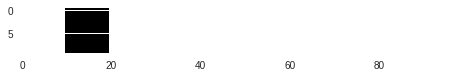

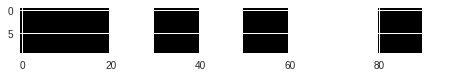

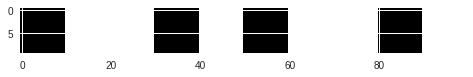

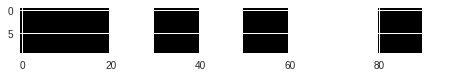

In [2]:
import numpy as np,sys
import matplotlib.pyplot as plt
import cv2

np.random.seed(678)
np.set_printoptions(precision=3)

# generate data / label
data = np.ones((10,100))
data[:10,10:20] = 0

label = data.copy()
label[:10,:10] = 0
label[:10,30:40] = 0
label[:10,50:60] = 0
label[:10,80:90] = 0

# hyper 
q_table = np.ones((10))
epilson = 0
num_epid = 8000
 
learing_rate = 0.8
discount  = 0.006

# train
for epid in range(num_epid):
    
    for state in range(0,label.shape[1]-10,10):

        current_state = data[:10,state:state+10]
        current_label = label[:10,state:state+10]
        
        epsilon = np.random.randint(10)
        if epsilon < 5:
            action = q_table[int(state/10)]
        else: 
            action = q_table[int(state/10)] - np.random.randn()/(epid+1e-8)

        ret, create_data = cv2.threshold(current_state, action, 1, cv2.THRESH_BINARY)
        reward = (1.0 -  cv2.bitwise_xor(current_label,create_data)).sum() / 100.0

        q_table[int(state/10)] = q_table[int(state/10)] + learing_rate * (
            reward + discount * q_table[int(state/10)+1] - q_table[int(state/10)] 
        )

            
# test and add the final value up
final = ""
for state in range(0,label.shape[1]-10,10):

    current_state = data[:10,state:state+10].astype(int)
    action = int(round(q_table[int(state/10)]))

    if state == 0 :
        final = current_state <= action
    else:
        if not current_state.sum()==action:
            append =  current_state <= action
        else:
            append = current_state
        final = np.hstack((final,append))

final = np.hstack((final,data[:10,90:]))
final_obained = final.copy()


final = ""
q_table_true = [0,0,1,0,1,0,1,1,0,1]
for state in range(0,label.shape[1]-10,10):
    
    current_state = data[:10,state:state+10].astype(int)
    action = q_table_true[int(state/10)]

    if state <= 0 :
        final = current_state <= action
    else:
        if not current_state.sum()==action:
            append =  current_state <= action
        else:
            append = current_state
        final = np.hstack((final,append))
final = np.hstack((final,data[:10,90:]))
final_truth = final.copy()

print('Raw Obtained Q Table By learning : ',q_table)
print('Rouneded Obtained Q Table By learning : ',np.round(q_table))
print('Hand Crafted Q Table : ',q_table_true)

print('-----------------------------')
print('Sumed value for original data: ',data.sum())
print('Sumed value for Ground Truth data: ',label.sum())
print('Sumed value for trained data: ',final_obained.sum())
print('Sumed value for hand crafted data: ',final_truth.sum())


plt.imshow(data,cmap='gray')
plt.show()

plt.imshow(label,cmap='gray')
plt.show()

plt.imshow(final_obained,cmap='gray')
plt.show()

plt.imshow(final_truth,cmap='gray')
plt.show()



# ---- end code ---